Comparison Table:
            Nodes    Edges  Avg Degree  Clustering Coefficient  \
Original   1005.0  16706.0   33.245771                0.399355   
BA Model   1005.0  15824.0   31.490547                0.081852   
WS Model   1005.0   8040.0   16.000000                0.517329   
SBM Model  1005.0   7159.0   14.246766                0.022481   

           Degree Assortativity  Avg Shortest Path  
Original              -0.010990          -1.000000  
BA Model              -0.019777           2.291574  
WS Model              -0.008432           3.536856  
SBM Model              0.121637           2.891489  


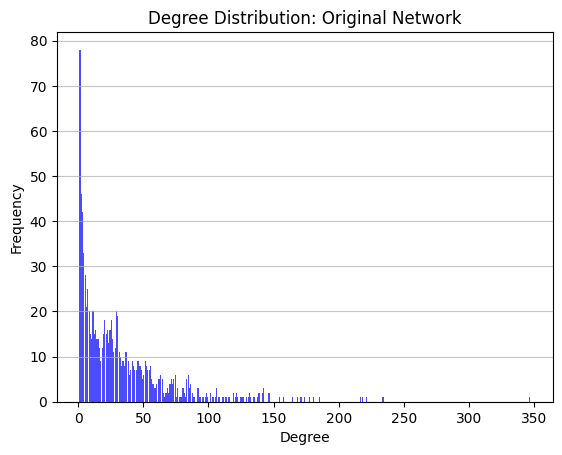

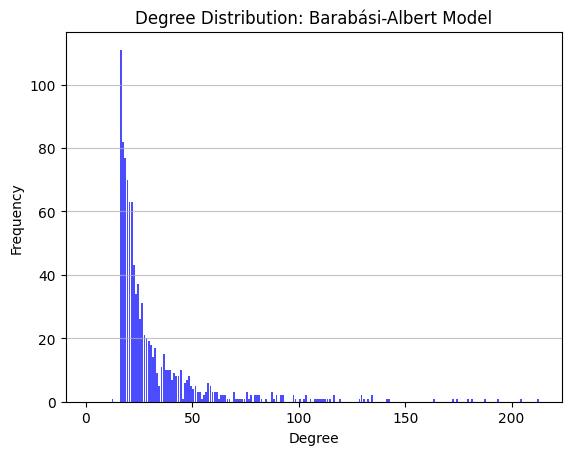

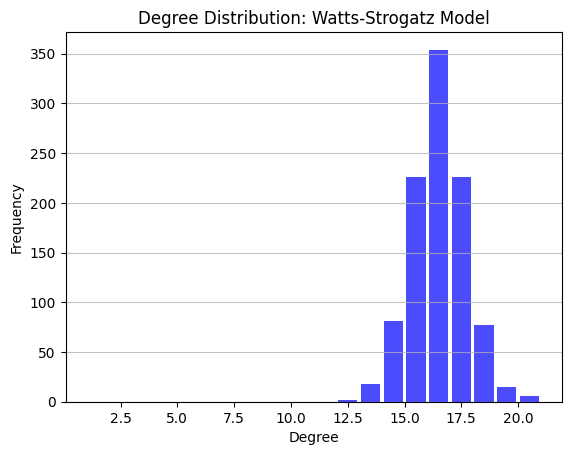

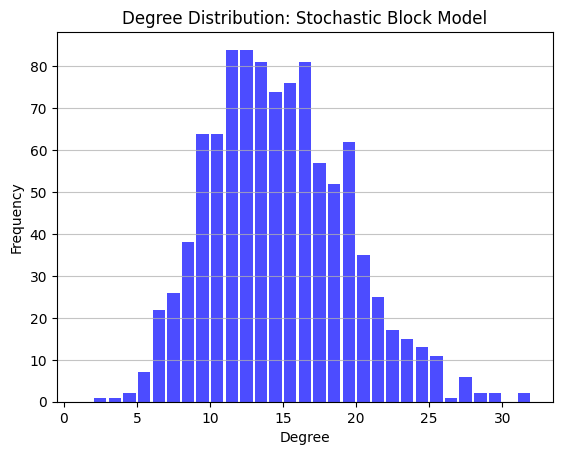

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

def create_network(email_path, department_path):
    G = nx.Graph()
    with open(department_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                node_id, department = parts
                G.add_node(node_id, department=int(department))
    with open(email_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                node1, node2 = parts
                G.add_edge(node1, node2) 
    return G

def calculate_metrics(G):
    metrics = {
        'Nodes': G.number_of_nodes(),
        'Edges': G.number_of_edges(),
        'Avg Degree': np.mean([d for _, d in G.degree()]),
        'Clustering Coefficient': nx.average_clustering(G),
        'Degree Assortativity': nx.degree_assortativity_coefficient(G),
        'Avg Shortest Path': nx.average_shortest_path_length(G) if nx.is_connected(G) else -1,
    }
    return metrics

def plot_degree_distribution(G, title):
    degrees = [d for _, d in G.degree()]
    plt.hist(degrees, bins=range(1, max(degrees) + 1), color='blue', alpha=0.7, rwidth=0.85)
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

EMAIL = 'desktop/email.txt'  
DEPARTMENT = 'desktop/email2.txt'  

G_original = create_network(EMAIL, DEPARTMENT)
n = G_original.number_of_nodes()
m = G_original.number_of_edges() // n 
k = m  # Average degree in WS model
p = 0.1  # Rewiring probability in WS model
G_BA = nx.barabasi_albert_graph(n, m)
G_WS = nx.watts_strogatz_graph(n, k, p)

department_counts = Counter(nx.get_node_attributes(G_original, 'department').values())
sizes = list(department_counts.values())
probs = [[0.1 if i == j else 0.01 for j in range(len(sizes))] for i in range(len(sizes))]
G_SBM = nx.stochastic_block_model(sizes, probs)

metrics_original = calculate_metrics(G_original)
metrics_BA = calculate_metrics(G_BA)
metrics_WS = calculate_metrics(G_WS)
metrics_SBM = calculate_metrics(G_SBM)

comparison = pd.DataFrame({
    "Original": metrics_original,
    "BA Model": metrics_BA,
    "WS Model": metrics_WS,
    "SBM Model": metrics_SBM
})
print("Comparison Table:")
print(comparison.T)
plot_degree_distribution(G_original, "Original Network")
plot_degree_distribution(G_BA, "Barabási-Albert Model")
plot_degree_distribution(G_WS, "Watts-Strogatz Model")
plot_degree_distribution(G_SBM, "Stochastic Block Model")
